In [1]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
##因為CV2會將照片讀成BGR，要轉回來
image = cv2.imread('./D24_Dog.JPG', cv2.IMREAD_COLOR)[...,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [2]:
Ground_Truth_BBOX = [1900, 700, 1800, 1800]
Prediction_BBOX = [1800, 800, 1500, 1500]

## 轉換成 [X0,Y0,X1,Y1]

In [3]:
Transform_coord = lambda x: [x[0], x[1], x[0]+x[2], x[1]+x[3]]

Ground_Truth_BBOX_coord = Transform_coord(Ground_Truth_BBOX)
Prediction_BBOX_coord = Transform_coord(Prediction_BBOX)

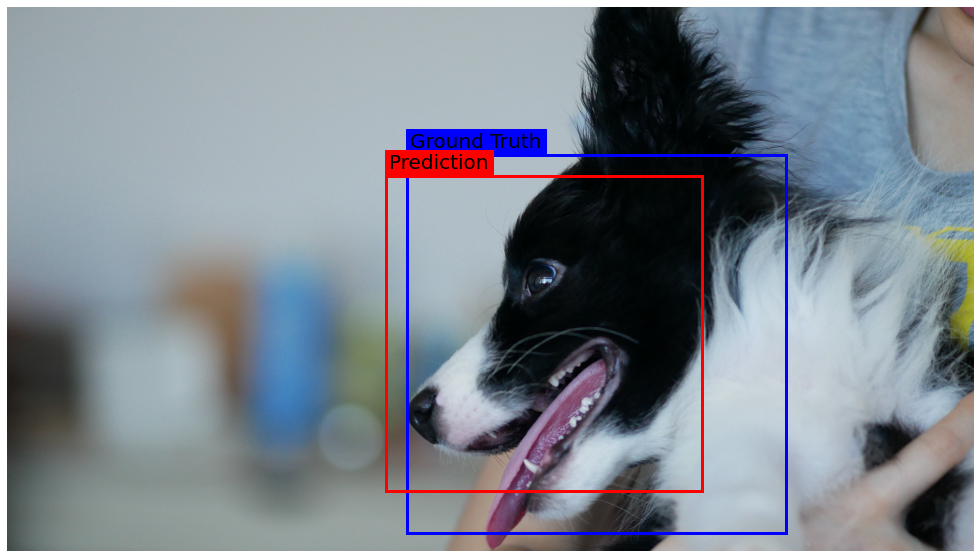

In [4]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots(1)
ax.axis('off')

# 畫出圖片
ax.imshow(image)

# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0], Ground_Truth_BBOX[1]), 
                           Ground_Truth_BBOX[2], Ground_Truth_BBOX[3], 
                           linewidth=3, edgecolor='b', facecolor='none')
ax.add_patch(rect_1)
ax.annotate('Ground Truth', (1915, 670), size=20, backgroundcolor = 'b')

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0], Prediction_BBOX[1]), 
                         Prediction_BBOX[2], Prediction_BBOX[3],
                         linewidth=3, edgecolor='r', facecolor='none',)
ax.add_patch(rect)
ax.annotate('Prediction', (1815, 770), size=20, backgroundcolor = 'r')

plt.show()

## 定義IOU計算

In [5]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    x0 = max(boxA[0], boxB[0])
    y0 = max(boxA[1], boxB[1])
    x1 = min(boxA[2], boxB[2])
    y1 = min(boxA[3], boxB[3])
    interBox = [x0, y0, x1, y1]
    
    # 計算區域公式
    area = lambda x0, y0, x1, y1: max(0, x1 - x0 + 1) * max(0, y1 - y0 + 1)
    
    # 計算交集區域
    interArea = area(*interBox)
    
    ## 計算各自的BBOX大小
    boxAArea = area(*boxA)
    boxBArea = area(*boxB)
    
    ## 計算IOU
    iou = interArea / (boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [6]:
IOU = bb_intersection_over_union(Ground_Truth_BBOX_coord, Prediction_BBOX_coord)
print('IOU值：',IOU)

IOU值： 0.6196482836879266
